# DATA ANALYST JOB EDA AND VISUALIZATION

This dataset contains more than 2000 job listing for data analyst positions, with features such as:

* Salary Estimate
* Location
* Company Rating
* Job Description
  and more.
we are going to analyze no. of job openings, revenues, Avg min and maximum salary etc 



In [ ]:
project_name = "DATA ANALYST JOB EDA AND VISULIZATION" 

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #to remove future warning

## Data Preparation and Cleaning



In [ ]:
#Load dataset
data=pd.read_csv("DataAnalyst.csv")

In [ ]:
data.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1


In [ ]:
data.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

**Data includes job title , salary estimation , job description , rating ,company name , location and many more ...**

# DATA CLEANING

### Remove the unnamed column

In [ ]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

### Check for missing values

In [ ]:
# We will be using function missing_values_table to check missing values

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


As some of the columns contains -1 or '-1.0' or '-1' etc . We need to clean this(This is kind of null values)

Replace -1 or -1.0 or '-1' to NaN

In [ ]:
missing_values_table(data)

Your selected dataframe has 15 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Company Name,1,0.0


Now you can see there are lots of missing values in the dataset. 'Easy Apply' and 'Competitors' has maximum number of missing values (> 50%)

Most companies has null values in easy apply because they are not hiring .

In [ ]:
data['Easy Apply'].value_counts()

-1      2173
True      80
Name: Easy Apply, dtype: int64

In [ ]:
data['Competitors'].value_counts()

-1                                                1732
Robert Half, Insight Global                         14
Adecco, Manpower                                    14
Google, Microsoft, Samsung Electronics              10
TEKsystems, Insight Global, Accenture               10
                                                  ... 
Aerotek, Kforce, Glotel                              1
Audi, BMW, Mercedes-Benz International               1
Cognizant Technology Solutions, Accenture, IBM       1
Aon, Accenture, Marsh & McLennan Companies           1
First Service Networks, SMS Assist, Vixxo            1
Name: Competitors, Length: 291, dtype: int64

In [ ]:
data['Competitors'].value_counts()

-1                                                1732
Robert Half, Insight Global                         14
Adecco, Manpower                                    14
Google, Microsoft, Samsung Electronics              10
TEKsystems, Insight Global, Accenture               10
                                                  ... 
Aerotek, Kforce, Glotel                              1
Audi, BMW, Mercedes-Benz International               1
Cognizant Technology Solutions, Accenture, IBM       1
Aon, Accenture, Marsh & McLennan Companies           1
First Service Networks, SMS Assist, Vixxo            1
Name: Competitors, Length: 291, dtype: int64

In [ ]:
data['Rating'].value_counts()[:5]

-1.0    272
 3.9    140
 3.6    135
 3.7    132
 5.0    131
Name: Rating, dtype: int64

In [ ]:
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [ ]:
missing_values_table(data)

Your selected dataframe has 15 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Easy Apply,2173,96.4
Competitors,1732,76.9
Founded,660,29.3
Industry,353,15.7
Sector,353,15.7
Rating,272,12.1
Headquarters,172,7.6
Size,163,7.2
Type of ownership,163,7.2
Revenue,163,7.2


In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)#to remove warning caused by iteration over strings

In [ ]:
data['Company Name'],_=data['Company Name'].str.split('\n', 1).str

In [ ]:
data['Job Title'],data['Department']=data['Job Title'].str.split(',', 1).str

In [ ]:
data['Salary Estimate'],_=data['Salary Estimate'].str.split('(', 1).str

In [ ]:
data['Min_Salary'],data['Max_Salary']=data['Salary Estimate'].str.split('-').str
data['Min_Salary']=data['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
data['Max_Salary']=data['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

## Exploratory Analysis and Visualization


In [ ]:
# Split salary into two columns min salary and max salary.
data.drop(['Salary Estimate'],axis=1,inplace=True)

# Current openings 

In [ ]:
data['Easy Apply']=data['Easy Apply'].fillna(False).astype('bool')

In [ ]:
df_easy_apply=data[data['Easy Apply']==True]
df=df_easy_apply.groupby('Company Name')['Easy Apply'].count().reset_index()
company_opening_df=df.sort_values('Easy Apply',ascending=False).head(10)


In [ ]:
company_opening_df

,Company Name,Easy Apply
3,Apex Systems,10
1,22nd Century Technologies,5
8,Chime,3
46,Signify Health,3
0,22nd Century Staffing,2
50,Tempus Labs,2
53,Undertone,2
5,BOLD,2
36,Omada Health,1
35,OSI Engineering,1


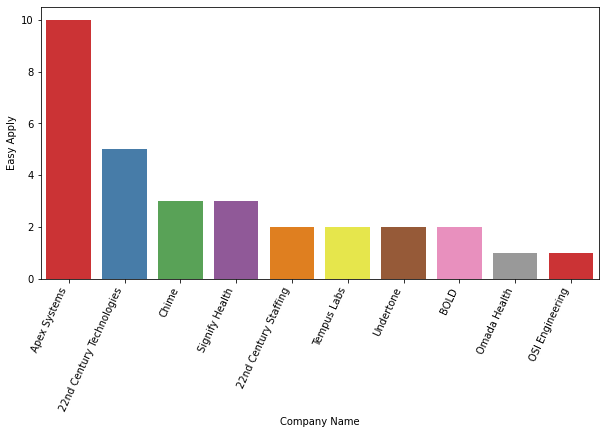

In [ ]:
#visualizing current opening with bar plot
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=company_opening_df,
    x='Company Name',
    y='Easy Apply',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 )

**These are the top 10 companies hiring for Data analyst roles**

# Salary Distribution of Data Analyst

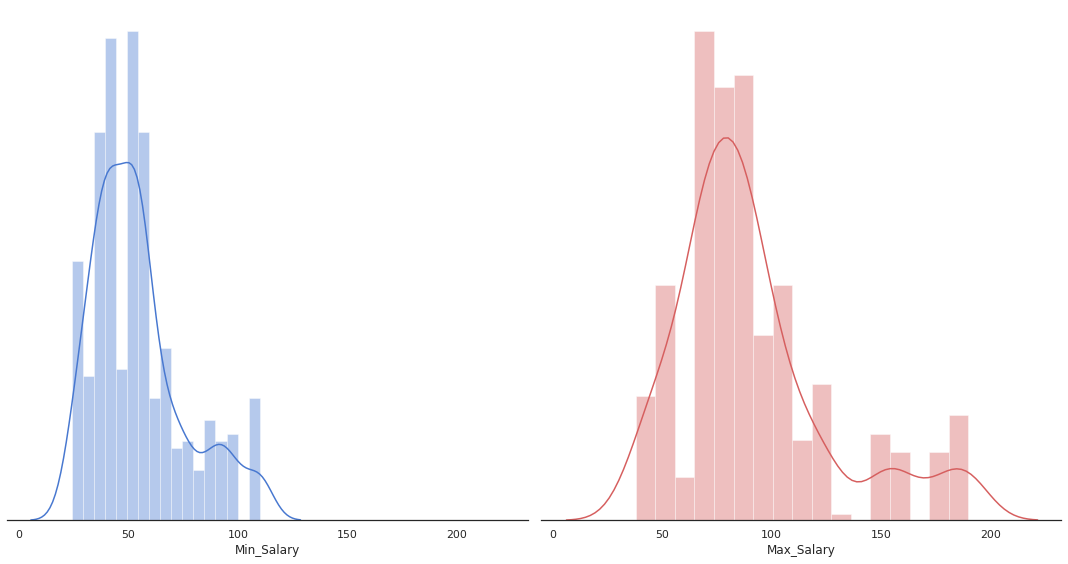

In [ ]:
data_analyst = data[data['Job Title']=='Data Analyst']


sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)

#Plot a histogram and kernel density estimate

sns.distplot(data_analyst['Min_Salary'], color="b", ax=axes[0])

sns.distplot(data_analyst['Max_Salary'], color="r",ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

# Top 20 Roles with their minimum and maximum salaries

In [ ]:
df=data.groupby('Location')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(20)

In [ ]:
df=data.groupby('Job Title')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(20)

In [ ]:
df

,Max_Salary,Min_Salary
Job Title,,
AI Insights Data Analyst,190.0,110.0
Data Analyst with Data Mapping and API,190.0,110.0
Senior Data Analyst Studio Finance Engineering,190.0,110.0
Senior HR Data Analyst,190.0,110.0
Sr. Data Analyst - Growth & Adoption,190.0,110.0
Tableau Data Analyst Intern,190.0,110.0
Business Intelligence Data Modeler/Analyst,178.0,99.0
Data Analyst (College & Foundation Reporting),178.0,99.0
Data Scientist/Analyst - Wilbur Labs,178.0,99.0


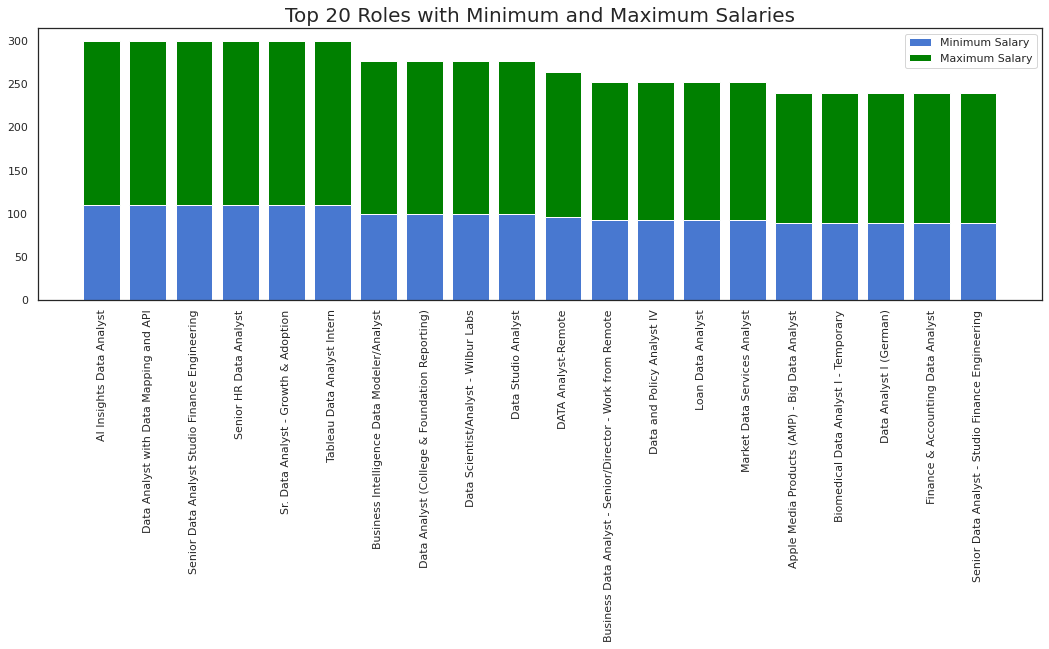

In [ ]:
#visualizing Top 20 Roles with Minimum and Maximum Salaries with stacked bar graph
f, ax = plt.subplots(figsize=(18,5))
plt.title('Top 20 Roles with Minimum and Maximum Salaries',fontsize=20)
plt.bar(df.index,df.Min_Salary)
plt.bar(df.index,df.Max_Salary,bottom=df.Min_Salary, color="green")
plt.legend(['Minimum Salary','Maximum Salary'])
plt.xticks(rotation=90);


# Size of Employees Vs No of Companies

In [ ]:
df=data['Size'].value_counts()

In [ ]:
df=pd.DataFrame(df)
df['employee_size']=df.index

In [ ]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [ ]:
df=df.rename(columns={"Size": "No_of_companies"})

In [ ]:
df

,Job Title,No_of_openings
0,Data Analyst,17
1,Senior Data Analyst,8
2,Senior Data Quality Analyst,2
3,Senior Analyst,2
4,Data Base Programmer/Analyst,2
5,Senior Product Data Analyst,2
6,Lead Data Analyst,2
7,BI/Data Analyst,1
8,Supply Chain Data Analyst,1
9,Client Data Analyst,1


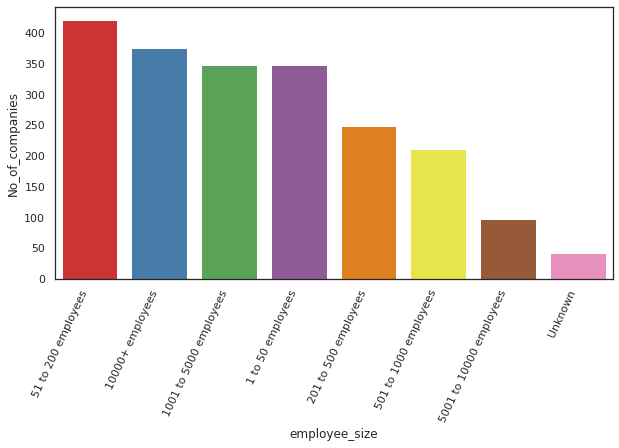

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='employee_size',
    y='No_of_companies',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)

**maximum companies having size 1-200 or 5000**

# Revenue of different sectors

In [ ]:
#The Revenue has  different units we need to change it into same unit and also has to take average as the revenue is given as interval
def filter_revenue(x):
    revenue=0
    if(x== 'Unknown / Non-Applicable' or type(x)==float):
        revenue=0
    elif(('million' in x) and ('billion' not in x)):
        maxRev = x.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            revenue = float(maxRev[0].replace('Less than','').strip())
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])
    elif(('billion'in x)):
        maxRev = x.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            revenue = float(maxRev[0].replace('+','').strip())*1000
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])*1000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])*1000
    return revenue
        

In [ ]:
data['Max_revenue']=data['Revenue'].apply(lambda x: filter_revenue(x))

In [ ]:
df=data.groupby('Sector')[['Max_revenue']].mean().sort_values(['Max_revenue'],ascending=False).head(20)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,Max_revenue
Sector,
Insurance,5465.196078
Mining & Metals,5000.000000
Aerospace & Defense,4884.090909
Telecommunications,4778.181818
Finance,4653.881657
Retail,4447.394737
Manufacturing,4382.625000
Media,3837.880952
Transportation & Logistics,3080.000000


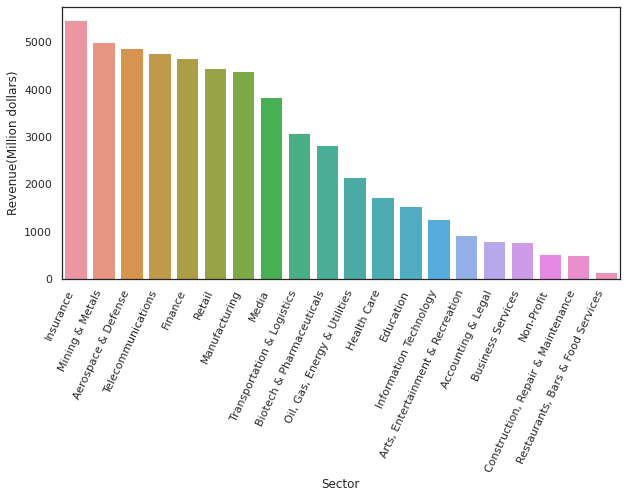

In [ ]:
#visualizing the revenue of different sectors
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x=df.index,
    y='Max_revenue'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Revenue(Million dollars)")


As you can see from the graph **highest revenue** is from **Insurance**

# Revenue of different Industries

In [ ]:
df=data.groupby('Industry')[['Max_revenue']].mean().sort_values(['Max_revenue'],ascending=False).head(20)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,Industry,Max_revenue
0,Drug & Health Stores,10000.000000
1,Grocery Stores & Supermarkets,10000.000000
2,Miscellaneous Manufacturing,10000.000000
3,General Merchandise & Superstores,10000.000000
4,Motion Picture Production & Distribution,10000.000000
5,Utilities,10000.000000
6,Truck Rental & Leasing,10000.000000
7,Chemical Manufacturing,10000.000000
8,Transportation Equipment Manufacturing,8333.333333
9,Home Centers & Hardware Stores,8000.000000


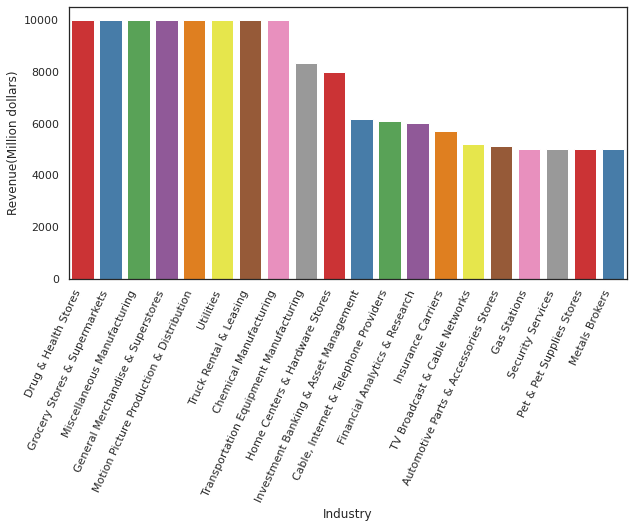

In [ ]:
#visualizing the revenue of different industries
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Industry',
    y='Max_revenue',
    palette='Set1'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Revenue(Million dollars)")

As you can see from the graph **highest revenue** is from **Drug & Health Stores**

# Ratings 

In [ ]:
count=data.groupby('Rating')['Company Name'].count()

In [ ]:
df=pd.DataFrame(count).rename(columns={'Company Name': 'Count'}).reset_index()

In [ ]:
df=df.sort_values('Rating',ascending=False).head(20)


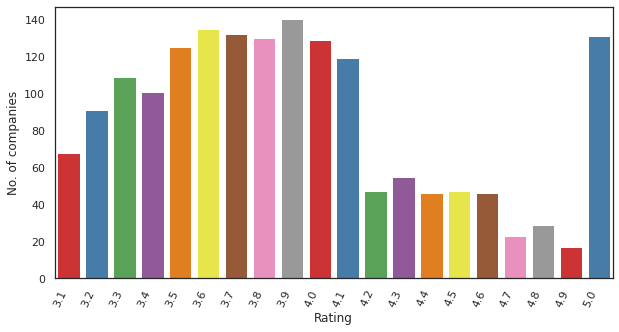

In [ ]:
#visualizing Ratings
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Rating',
    y='Count',
    palette='Set1'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("No. of companies")

# Industries with their Average minimum and maximum salaries

In [ ]:
df=data.groupby('Industry')[['Min_Salary','Max_Salary']].mean().rename(columns={'Min_Salary':'Avg_min_salary','Max_Salary':'Avg_max_salary'})

In [ ]:
df=df.reset_index()

In [ ]:
df=df.sort_values(['Avg_max_salary','Avg_max_salary'],ascending=False)

In [ ]:
df

,Industry,Avg_min_salary,Avg_max_salary
0,Education Training Services,69.666667,116.000000
1,Gambling,64.000000,112.000000
2,Health Care Products Manufacturing,69.200000,110.400000
3,Transportation Equipment Manufacturing,60.333333,109.666667
4,Electrical & Electronic Manufacturing,60.833333,108.500000
...,...,...,...
83,Vehicle Dealers,39.000000,60.333333
84,Oil & Gas Services,36.250000,56.500000
85,Grocery Stores & Supermarkets,28.333333,54.666667
86,Audiovisual,24.000000,48.000000


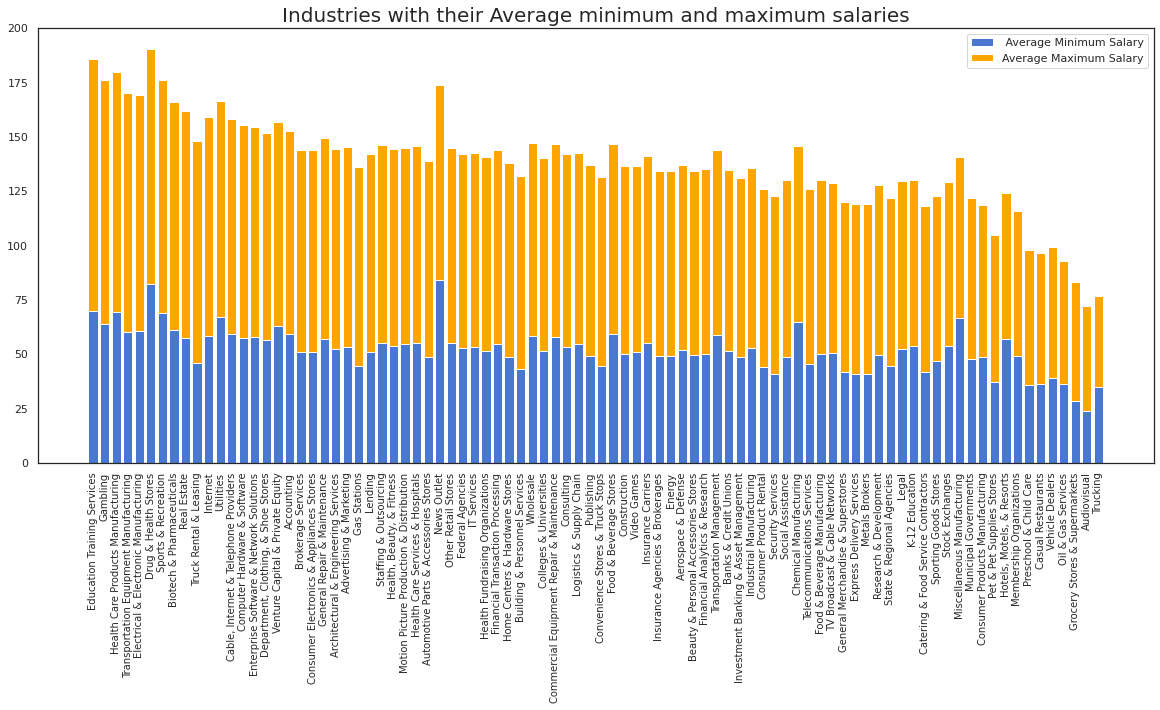

In [ ]:
#visualizing Industries with their Average minimum and maximum salaries
f, ax = plt.subplots(figsize=(20,8))
plt.title('Industries with their Average minimum and maximum salaries',fontsize=20)
plt.bar(df.Industry,df.Avg_min_salary)
plt.bar(df.Industry,df.Avg_max_salary,bottom=df.Avg_min_salary, color="orange")
plt.legend([' Average Minimum Salary','Average Maximum Salary'])
plt.xticks(rotation=90,fontsize=10);


# Jobs with Openings

In [ ]:
df=pd.DataFrame(data[data['Easy Apply']==True]['Job Title'].value_counts()).rename(columns={'Job Title':'No_of_openings'})

In [ ]:
df=df.reset_index().rename(columns={'index':'Job Title'})

In [ ]:
df=df.head(10)

In [ ]:
df

,Job Title,No_of_openings
0,Data Analyst,17
1,Senior Data Analyst,8
2,Senior Data Quality Analyst,2
3,Senior Analyst,2
4,Data Base Programmer/Analyst,2
5,Senior Product Data Analyst,2
6,Lead Data Analyst,2
7,BI/Data Analyst,1
8,Supply Chain Data Analyst,1
9,Client Data Analyst,1


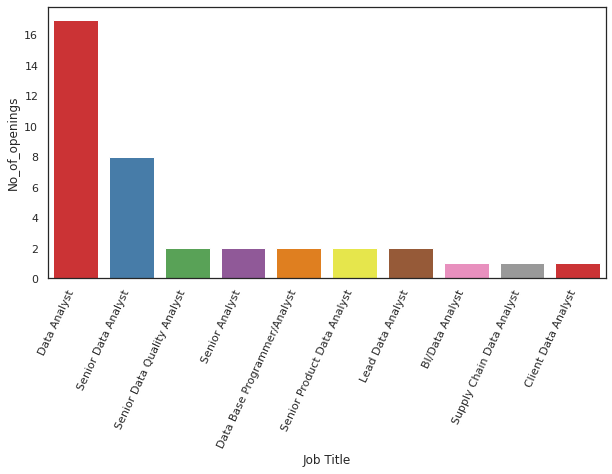

In [ ]:
#visualizing job opening of data analyst
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Job Title',
    y='No_of_openings',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "cvam-jnv/data-analyst-job-eda-and-visulization" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/cvam-jnv/data-analyst-job-eda-and-visulization


'https://jovian.ml/cvam-jnv/data-analyst-job-eda-and-visulization'

## Asking and Answering Questions

## What is the maximum salary offered to Data Analyst ?

In [ ]:
maximum_salary=data_analyst['Max_Salary'].max()
print('The maximum salary offered to Data Analyst is ${}k.'.format(maximum_salary))

The maximum salary offered to Data Analyst is $190k.


# What is the minimum salary offered to Data Analyst ?

In [ ]:
minimum_salary=data_analyst['Max_Salary'].min()
print('The minimum salary offered to Data Analyst is ${}k.'.format(minimum_salary))

The minimum salary offered to Data Analyst is $38k.


# What is the maximum number of job opening for Data Analyst?

In [ ]:
df=pd.DataFrame(data[data['Easy Apply']==True]['Job Title'].value_counts()).rename(columns={'Job Title':'No_of_openings'})
df=df.reset_index().rename(columns={'index':'Job Title'})
max_job_opening=df.No_of_openings.max()
print('The maximum job opening for Data Analyst is  {}.'.format(max_job_opening))

The maximum job opening for Data Analyst is  17.


# What is the maximum easy apply job openings?

In [ ]:
max_easy_apply=company_opening_df['Easy Apply'].max()
print('The maximum easy apply job for Data Analyst is  {}.'.format(max_easy_apply))

The maximum easy apply job for Data Analyst is  10.


# Which company has the maximum easy apply job openings ?

In [ ]:
company_opening_df.loc[company_opening_df['Easy Apply'] == max_easy_apply]

,Company Name,Easy Apply
3,Apex Systems,10


The Apex Systems has maximum easy apply openings

# Miscellaneous Questions

# which sector has maximum Revenue?

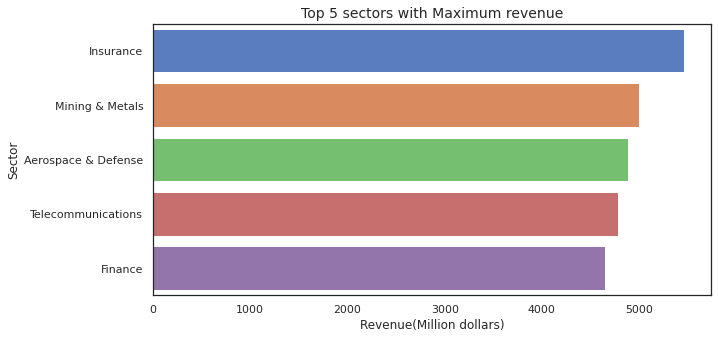

In [ ]:
data['Max_revenue']=data['Revenue'].apply(lambda x: filter_revenue(x))
df=data.groupby('Sector')[['Max_revenue']].mean().sort_values(['Max_revenue'],ascending=False).head(5)
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x=df.Max_revenue,
    y=df.index
)

chart.axes.xaxis.label.set_text("Revenue(Million dollars)")
chart.set_title('Top 5 sectors with Maximum revenue',fontsize=14);

The insurance sector has maximum Revenue

# Which sector has maximum number of Employees ?

In [ ]:
df=pd.DataFrame(df)
df['employee_size']=df.index
df['employee_size'].max()


'Telecommunications'

## Inferences and Conclusion

The Data Analyst has 17 job openings for now 

The Data analyst has salary in between $ 38k-190k

Apex system offered 10 easy apply job opening for data analyst 

There are 443 listing of Data analyst but not all companies are hiriing

## References and Future Work
There's a wealth of information to be discovered using the survey, and we've barely scratched the surface. Here are some ideas for further exploration:

Repeat the analysis for different Job
Choose a different set of columns (we chose on 20 out of 65) to analyze other facets of the data
Prepare an analysis focusing on diversity - and identify areas where underrepresented communities are at par with the majority (e.g. education) and where they aren't (e.g. salaries)
Compare the results of this year's survey with the previous years and identify interesting trends
References:

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

1. [First Steps with Python and Jupyter](https://jovian.ml/aakashns/first-steps-with-python)
2. [A Quick Tour of Variables and Data Types](https://jovian.ml/aakashns/python-variables-and-data-types)
3. [Branching using Conditional Statements and Loops](https://jovian.ml/aakashns/python-branching-and-loops)
4. [Writing Reusable Code Using Functions](https://jovian.ml/aakashns/python-functions-and-scope)
5. [Reading from and Writing to Files](https://jovian.ml/aakashns/python-os-and-filesystem)
6. [Numerical Computing with Python and Numpy](https://jovian.ml/aakashns/numerical-computing-with-numpy)

